In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
                "pgf.texsystem": "pdflatex",
                'font.family': 'serif',
                'text.usetex': True,
                'pgf.rcfonts': False,
            })

In [330]:
exp_type = 'simulation'
exp = 'pv2'
#exp_name = '2024_03_22-16_00_41' 
#exp_name = '2024_02_21-14_06' #10C
exp_name = '2024_03_22-10_40_45' #pv2 circuit thermal
#exp_name = '2024_03_22-10_41_54' #pv2 mlp

**Prepare structures and functions to plot everything we need**

In [331]:
folder_exp_dict = {'pv': 'PV_profile', 'pv2': 'PV_profile2', '20C': '20C_check_up', '10C': '10C_check_up'}

In [332]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [364]:
def plot_compared_data(dfs, 
                       variables: list, 
                       x_axes: list,
                       labels: list, 
                       x_label: str,
                       y_label: str,
                       markers: list,
                       line_styles: list,
                       title: str, 
                       colors=None, 
                       save_fig=False, 
                       fig_name='',
                       plot_type='',
                       show_legend=False,
                       show_xaxis=False
                      ):
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
    markevery = [3000, 3500]
    
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        if plot_type == 'scatter':
            plt.scatter(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], s=0.1, rasterized=True)
        else:
            plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], markevery=markevery[i], linestyle=line_styles[i])
    
    plt.ticklabel_format(style='plain')
    plt.tick_params(labelsize=30)
    plt.xlabel(x_label, size=34)
    plt.ylabel(y_label, size=34)
    
    if not show_xaxis:
        plt.xticks(color='w')
        
    # plt.title(title, fontsize=20, y=1)
    
    if show_legend:
        plt.legend(fontsize=30, loc='upper center', markerscale=3, bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, handletextpad=0.3)
    
    if save_fig:
        plt.savefig(fig_name, format='svg', transparent=True, dpi=200, bbox_inches='tight')
    
    plt.show()

In [365]:
def organize_plots_for_paper(args, save_fig=False):
    for i, arg in enumerate(args):
        
        if i == 0:
            arg['show_legend'] = True
        
        if i == len(args) - 1:
            arg['show_xaxis'] = True
        else:
            arg['x_label'] = ''

        arg['save_fig'] = save_fig
        plot_compared_data(**arg)

### RETRIEVE SIMULATION AND GROUND DATA

In [366]:
df_out = pd.read_csv(output_file)
df_out = df_out.iloc[1:]
df_out

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
1,0.0,0.660139,1.0,3.834017,10.011241,37.642267,3.805210,0.002828,0.003250,19972.909946,295.151195,0.283526
2,1.0,0.660276,1.0,3.834116,9.836459,37.713150,3.805328,0.002828,0.003251,19977.991580,295.152355,0.273917
3,2.0,0.660412,1.0,3.834710,9.839729,37.726665,3.805443,0.002828,0.003251,19982.975500,295.153515,0.274436
4,3.0,0.660549,1.0,3.835299,9.843857,37.748338,3.805559,0.002828,0.003252,19987.960529,295.154675,0.275130
5,4.0,0.660686,1.0,3.835858,9.839819,37.738653,3.805674,0.002828,0.003253,19992.947351,295.155834,0.275491
...,...,...,...,...,...,...,...,...,...,...,...,...
97334,97333.0,0.574789,1.0,3.739337,-0.231550,-0.865850,3.740751,0.002857,0.002961,17703.020443,295.127673,0.000344
97335,97334.0,0.574786,1.0,3.739324,-0.236056,-0.882693,3.740749,0.002857,0.002961,17703.032733,295.127680,0.000350
97336,97335.0,0.574783,1.0,3.739303,-0.242793,-0.907882,3.740747,0.002857,0.002961,17703.045034,295.127686,0.000358
97337,97336.0,0.574779,1.0,3.739276,-0.251813,-0.941604,3.740745,0.002857,0.002961,17703.057356,295.127691,0.000371


In [367]:
df_ground = pd.read_csv(ground_file)
df_ground 

,current,voltage,temperature,power,time
0,9.9977,3.7651,295.7052,37.642267,0.0
1,9.9995,3.7715,295.7561,37.713150,1.0
2,9.9995,3.7729,295.6832,37.726665,2.0
3,10.0022,3.7740,295.6290,37.748338,3.0
4,9.9972,3.7749,295.6512,37.738653,4.0
...,...,...,...,...,...
97333,-0.2322,3.7295,294.6920,-0.865850,97333.0
97334,-0.2367,3.7296,294.6675,-0.882693,97334.0
97335,-0.2434,3.7295,294.7581,-0.907882,97335.0
97336,-0.2525,3.7299,294.7072,-0.941604,97336.0


### PLOT COMPARED DATA

In [368]:
args_20c =[]

args_20c_V = {
    'dfs': [df_ground, df_out], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[V]',
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Voltage',
    'save_fig': True,
    'fig_name': '20C_V.svg',
    'colors': ['cyan', 'violet'],
    'plot_type': 'scatter'
}

args_20c_T = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'markers': ['o', 's'],
    'line_styles': ['--', '-'],
    'title': 'Temperature w/ circuital thermal model',
    'save_fig': True,
    'fig_name': '20C_T.svg',
    'colors': ['cyan', 'violet'],
    'plot_type': 'scatter'
}

args_20c.append(args_20c_V)
args_20c.append(args_20c_T)

In [369]:
args_10c = {
    'dfs': [df_out, df_ground], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Ground'],
    'x_label': 'Time [s]',
    'y_label': '[°C]',
    'markers': ['o', 's'],
    'line_styles': ['-', '--'],
    'title': 'Voltage',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

In [370]:
args_pv2 = []

"""
args_pv2_V = {
    'dfs': [df_ground, df_out], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[V]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Voltage',
    'save_fig': False,
    'fig_name': 'PV2_V.svg',
    'colors': ['cyan', 'violet']
}

args_pv2_T_mlp = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Temperature w/ MLP thermal model',
    'save_fig': False,
    'fig_name': 'PV2_T_mlp.svg',
    'colors': ['cyan', 'violet']
}

"""
args_pv2_T_rc = {
    'dfs': [df_ground, df_out], 
    'variables': ['temperature', 'temperature'], 
    'x_axes': ['time', 'time'],
    'labels': ['Ground', 'Simulated'],
    'x_label': 'Time [s]',
    'y_label': '[K]',
    'line_styles': ['--', '-'],
    'markers': ['o', 's'],
    'title': 'Temperature w/ circuital thermal model',
    'save_fig': False,
    'fig_name': 'PV2_T.svg',
    'colors': ['cyan', 'violet']
}


args_pv2.append(args_pv2_V)
args_pv2.append(args_pv2_T_rc)
args_pv2.append(args_pv2_T_mlp)

In [371]:
args = {
    #'pv': args_pv, 
    '10C': args_10c, 
    '20C': args_20c, 
    'pv2': args_pv2
}

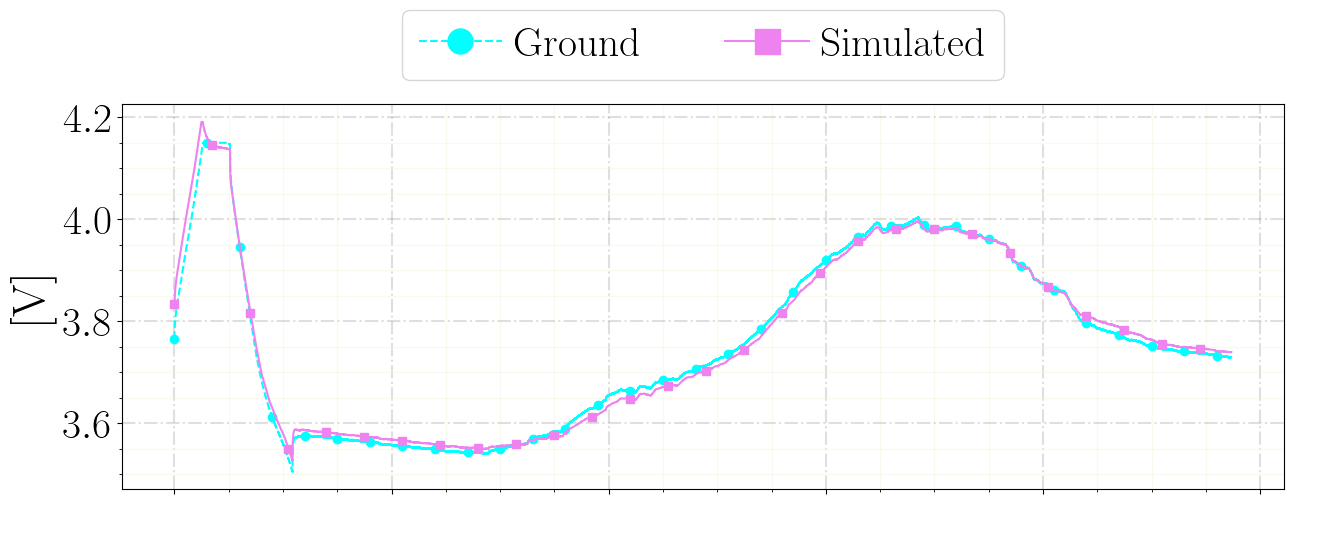

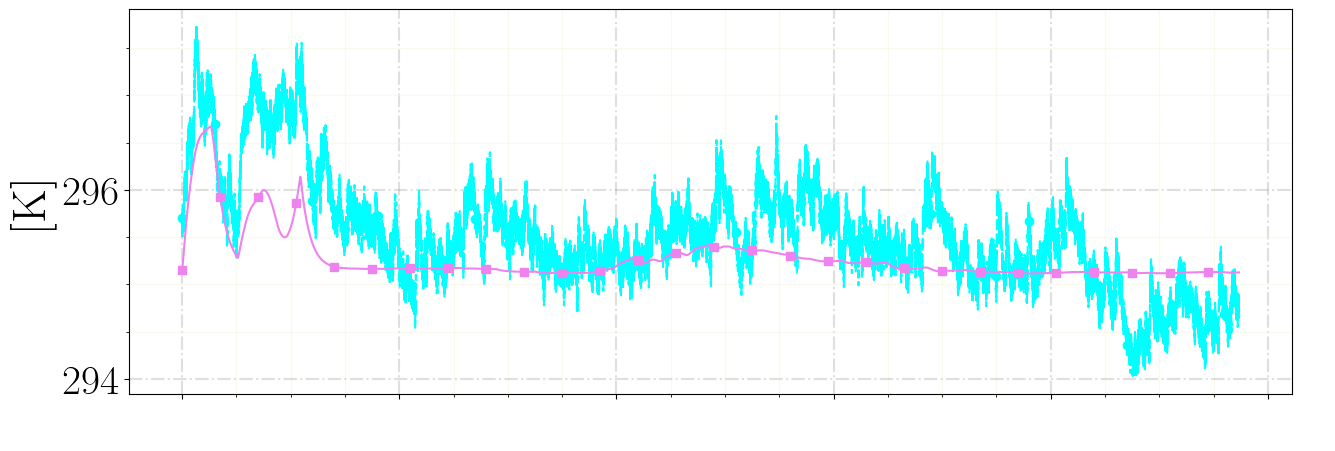

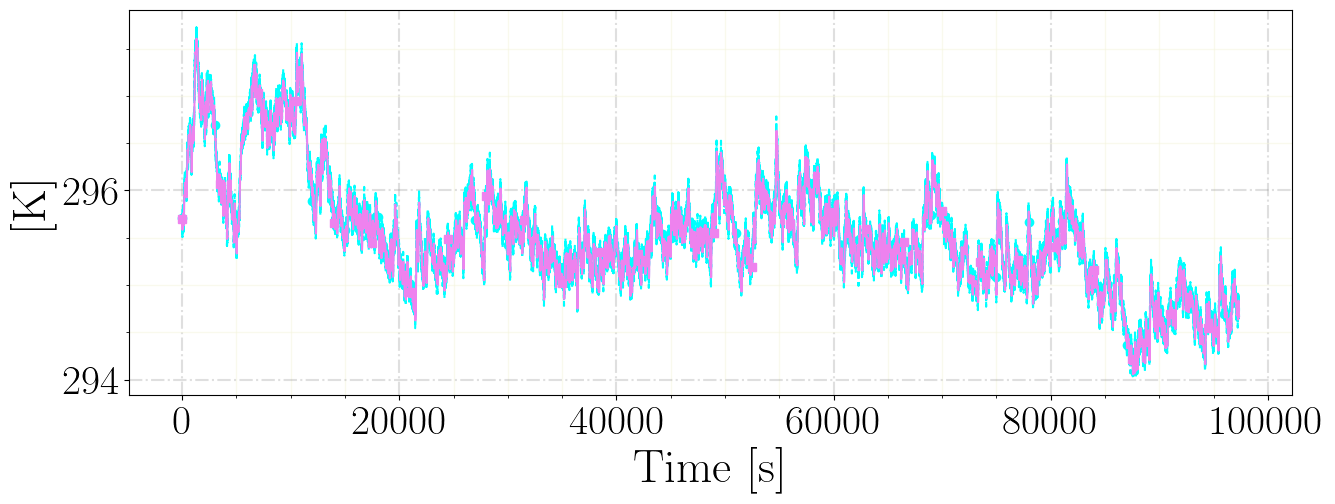

In [372]:
organize_plots_for_paper(args[exp], save_fig=True)